In [44]:
import os
import re
import nltk
import spacy
import string
import textract # Import textract
import pandas as pd
import seaborn as sns
from matplotlib import pylab
from matplotlib import pyplot as plt

from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from wordcloud import WordCloud, STOPWORDS
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings('ignore')

In [45]:
from google.colab import drive # Import the drive module for mounting Google Drive
drive.mount('/content/drive') # Mount Google Drive at /content/drive

import os

# Update the path if necessary, ensuring it's correct
path = r'/content/drive/MyDrive/RESUME_CLASSIFICATION/Resumes'

# List the directory contents
os.listdir(path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['Peoplesoft',
 'workday resumes',
 'SQL Developer Lightning insight',
 'React_JS']

In [54]:
from google.colab import drive
drive.mount('/content/drive')

import os

# Verify the path to the directory containing your resumes
directory1 = '/content/drive/MyDrive/RESUME_CLASSIFICATION/Resumes/Peoplesoft/'

# Check if the directory exists
if os.path.exists(directory1):
    print(f"Directory '{directory1}' exists.")
else:
    print(f"Directory '{directory1}' does not exist. Please verify the path.")

file_path1 = []
category1 = []

# Only proceed if the directory exists
if os.path.exists(directory1):
    for i in os.listdir(directory1):
        if i.endswith('.docx'):
            file_path = os.path.join(directory1, i)  # Store the full file path
            file_path1.append((textract.process(file_path)).decode('utf-8'))
            category1.append('Peoplesoft')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Directory '/content/drive/MyDrive/RESUME_CLASSIFICATION/Resumes/Peoplesoft/' exists.


In [55]:
data1 = pd.DataFrame(data = file_path1 , columns = ['Raw_Details'])
data1['Category1'] = category1
data1

,Raw_Details,Category1
0,Classification: Internal\n\nClassification: In...,Peoplesoft
1,PeopleSoft Administration\n\n \n\nVivekanand S...,Peoplesoft
2,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",Peoplesoft
3,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,Peoplesoft
4,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...,Peoplesoft
5,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,Peoplesoft
6,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,Peoplesoft
7,Hari Narayana \t\t \n\n\t\n\n\n\n...,Peoplesoft
8,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,Peoplesoft
9,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...,Peoplesoft


In [58]:
file_path2 = []
category2  = []
directory2 = '/content/drive/MyDrive/RESUME_CLASSIFICATION/Resumes/React_JS/'
for i in os.listdir(directory2):
    if i.endswith('.docx'):
        os.path.join(directory2, i)
        file_path2.append((textract.process(os.path.join(directory2, i))).decode('utf-8'))
        category2.append('React JS Developer')

In [59]:
data2 = pd.DataFrame(data = file_path2 , columns = ['Raw_Details'])
data2['Category2'] = category2
data2

,Raw_Details,Category2
0,SUSOVAN BAG \n\nSeeking a challenging po...,React JS Developer
1,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...,React JS Developer
2,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React JS Developer
3,Venkatalakshmi Pedireddy\n\nSoftware Developer...,React JS Developer
4,Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...,React JS Developer
5,Kotani Durga Prasad\n\n\n\n\n\nObjective:\n\n\...,React JS Developer
6,Thirupathamma Balla\n\n\n\nSUMMARY:\n\n\n\n2.8...,React JS Developer
7,KAMALAKAR REDDY. A \n\nLinked In: https://www....,React JS Developer
8,Name: Ravali P \n\n\n\n ...,React JS Developer
9,Ui-Developer/ React JS Developer \n\nNAME: KRI...,React JS Developer


In [61]:
file_path3 = []
category3  = []
directory3 = '/content/drive/MyDrive/RESUME_CLASSIFICATION/Resumes/SQL_Developer/'
for i in os.listdir(directory3):
    if i.endswith('.docx'):
        os.path.join(directory3, i)
        file_path3.append((textract.process(os.path.join(directory3, i))).decode('utf-8'))
        category3.append('SQL_Developer')

In [62]:
data3 = pd.DataFrame(data = file_path3 , columns = ['Raw_Details'])
data3['Category3'] = category3
data3

,Raw_Details,Category3
0,Aradhana Tripathi\n\n\n\nCurrent Location: Gac...,SQL_Developer
1,ANIL KUMAR MADDUKURI \t\t\n\nSQL & MSBI Devel...,SQL_Developer
2,RAJU PAVANA KUMARI\n\n\n\n\t\n\n\tProfessional...,SQL_Developer
3,resume\n\n\n\n\n\n\t\t\t\t\t\t\t\t\t\t\t\tRama...,SQL_Developer
4,SQL AND MSBI DEVELOPER\n\nSQL AND MSBI DEVELOP...,SQL_Developer
5,Name: Ramesh\n\n\t\n\n\tCareer Objective: \n\n...,SQL_Developer
6,Resume\n\nName : Neeraj Mishra\n\n\n\nExp...,SQL_Developer
7,SQL SERVER DEVELOPER\n\n\n\n\n\nP. Syam Kumar ...,SQL_Developer
8,BUDDHA VAMSI ...,SQL_Developer
9,KAMBALLA PRADEEP ...,SQL_Developer


In [63]:
file_path4 = []
category4  = []
directory4 = '/content/drive/MyDrive/RESUME_CLASSIFICATION/Resumes/workday'
for i in os.listdir(directory4):
    if i.endswith('.docx'):
        os.path.join(directory4, i)
        file_path4.append((textract.process(os.path.join(directory4, i))).decode('utf-8'))
        category4.append('workday')

In [64]:
data4 = pd.DataFrame(data = file_path4 , columns = ['Raw_Details'])
data4['Category4'] = category4
data4

,Raw_Details,Category4
0,Chinna Subbarayudu M\n\nDOB: 06th March 1994\n...,workday
1,Name : Gopi Krishna Reddy\n\n\t\t ...,workday
2,VENKATA SAIKRISHNA\n\n Workday Consultant\n\n\...,workday
3,Mooraboyina Guravaiah\n\nWorkday Integration S...,workday
4,G Himaja\n\n ...,workday
5,Workday HCM Techno functional Consultant ...,workday
6,JYOTI VERMA\t\t\t\t\t\n\n\n\nPROFESSIONAL SUMM...,workday
7,Ramesh A\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t...,workday
8,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...,workday
9,Srikanth (WORKDAY hCM Consultant)\t ...,workday


In [66]:
resume_data = pd.concat([data1, data2, data3, data4], ignore_index=True)
resume_data

,Raw_Details,Category1,Category2,Category3,Category4
0,Classification: Internal\n\nClassification: In...,Peoplesoft,NaN,NaN,NaN
1,PeopleSoft Administration\n\n \n\nVivekanand S...,Peoplesoft,NaN,NaN,NaN
2,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",Peoplesoft,NaN,NaN,NaN
3,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,Peoplesoft,NaN,NaN,NaN
4,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...,Peoplesoft,NaN,NaN,NaN
5,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,Peoplesoft,NaN,NaN,NaN
6,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,Peoplesoft,NaN,NaN,NaN
7,Hari Narayana \t\t \n\n\t\n\n\n\n...,Peoplesoft,NaN,NaN,NaN
8,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,Peoplesoft,NaN,NaN,NaN
9,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...,Peoplesoft,NaN,NaN,NaN


In [67]:
resume_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Raw_Details  52 non-null     object
 1   Category1    10 non-null     object
 2   Category2    20 non-null     object
 3   Category3    11 non-null     object
 4   Category4    11 non-null     object
dtypes: object(5)
memory usage: 2.2+ KB


In [68]:
resume_data['Category'] = category1 + category2 + category3 + category4
resume_data

,Raw_Details,Category1,Category2,Category3,Category4,Category
0,Classification: Internal\n\nClassification: In...,Peoplesoft,NaN,NaN,NaN,Peoplesoft
1,PeopleSoft Administration\n\n \n\nVivekanand S...,Peoplesoft,NaN,NaN,NaN,Peoplesoft
2,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",Peoplesoft,NaN,NaN,NaN,Peoplesoft
3,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,Peoplesoft,NaN,NaN,NaN,Peoplesoft
4,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...,Peoplesoft,NaN,NaN,NaN,Peoplesoft
5,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,Peoplesoft,NaN,NaN,NaN,Peoplesoft
6,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,Peoplesoft,NaN,NaN,NaN,Peoplesoft
7,Hari Narayana \t\t \n\n\t\n\n\n\n...,Peoplesoft,NaN,NaN,NaN,Peoplesoft
8,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,Peoplesoft,NaN,NaN,NaN,Peoplesoft
9,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...,Peoplesoft,NaN,NaN,NaN,Peoplesoft


In [69]:
resume_data.drop(['Category1', 'Category2', 'Category3', 'Category4'], axis = 1, inplace = True)
resume_data = resume_data[["Category", "Raw_Details"]]

In [70]:

resume_data.head(15)

,Category,Raw_Details
0,Peoplesoft,Classification: Internal\n\nClassification: In...
1,Peoplesoft,PeopleSoft Administration\n\n \n\nVivekanand S...
2,Peoplesoft,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n..."
3,Peoplesoft,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...
4,Peoplesoft,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...
5,Peoplesoft,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...
6,Peoplesoft,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...
7,Peoplesoft,Hari Narayana \t\t \n\n\t\n\n\n\n...
8,Peoplesoft,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...
9,Peoplesoft,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...


In [71]:
resume_data["Raw_Details"][4]

'Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSeeking a challenging role in the area of IT to work in an organization where I can utilize my functional knowledge to provide the best solutions to the business.\n\n\n\nPROFESSIONAL SUMMARY:\n\n\n\n\t\tFunctional Expertise in the below PeopleSoft Finance modules\n\n\tPurchase\n\n\tAccount Payables\n\n\t\tExperienced in working with Reporting tools like PS-query.\n\n\t\tEnd-End functional knowledge of AP & PO modules and handled various change requests from the user.\n\n\n\nSYNOPSIS\n\n\t\tEnergetic and result oriented professional with 3.6 years of experience in IT. Extended expertise in PeopleSoft Financials 9.2 in the area of design, maintenance and production support. Deep understanding of technology with focus on delivering business solutions. Presently working as Sr. System Engineer\n\n\t\tExcellent decision-making skills with a positive approach.\n\n\t\tDedicated and highly ambitious to achieve personal goals as well as the organizatio

In [72]:
resume_data.to_csv('Raw_Resume.csv', index=False)

In [76]:
resume_data = pd.read_csv("Raw_Resume.csv")
resume_data

,Category,Raw_Details
0,Peoplesoft,Classification: Internal\n\nClassification: In...
1,Peoplesoft,PeopleSoft Administration\n\n \n\nVivekanand S...
2,Peoplesoft,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n..."
3,Peoplesoft,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...
4,Peoplesoft,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...
5,Peoplesoft,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...
6,Peoplesoft,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...
7,Peoplesoft,Hari Narayana \t\t \n\n\t\n\n\n\n...
8,Peoplesoft,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...
9,Peoplesoft,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...


In [78]:
resume_data[resume_data.Category == 'workday']

,Category,Raw_Details
41,workday,Chinna Subbarayudu M\n\nDOB: 06th March 1994\n...
42,workday,Name : Gopi Krishna Reddy\n\n\t\t ...
43,workday,VENKATA SAIKRISHNA\n\n Workday Consultant\n\n\...
44,workday,Mooraboyina Guravaiah\n\nWorkday Integration S...
45,workday,G Himaja\n\n ...
46,workday,Workday HCM Techno functional Consultant ...
47,workday,JYOTI VERMA\t\t\t\t\t\n\n\n\nPROFESSIONAL SUMM...
48,workday,Ramesh A\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t...
49,workday,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...
50,workday,Srikanth (WORKDAY hCM Consultant)\t ...


In [79]:
resume_data.isnull().sum()

,0
Category,0
Raw_Details,0


In [80]:
resume_data['Word_Count'] = resume_data['Raw_Details'].apply(lambda x: len(str(x).split(" ")))
resume_data[['Raw_Details','Word_Count']].head()

,Raw_Details,Word_Count
0,Classification: Internal\n\nClassification: In...,558
1,PeopleSoft Administration\n\n \n\nVivekanand S...,2585
2,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",455
3,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,1023
4,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...,363


In [81]:
resume_data['Char_Count'] = resume_data['Raw_Details'].str.len() ## this also includes spaces
resume_data[['Raw_Details','Char_Count']].head()

,Raw_Details,Char_Count
0,Classification: Internal\n\nClassification: In...,4917
1,PeopleSoft Administration\n\n \n\nVivekanand S...,16112
2,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",3800
3,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,8010
4,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...,2852


In [83]:
import nltk

# Download the 'stopwords' dataset
nltk.download('stopwords')

from nltk.corpus import stopwords
stop = stopwords.words('english')
resume_data['Stopwords'] = resume_data['Raw_Details'].apply(lambda x: len([x for x in x.split() if x in stop]))
resume_data[['Raw_Details','Stopwords']].head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,Raw_Details,Stopwords
0,Classification: Internal\n\nClassification: In...,114
1,PeopleSoft Administration\n\n \n\nVivekanand S...,520
2,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",86
3,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,190
4,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...,98


In [84]:
resume_data['Numerics'] = resume_data['Raw_Details'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
resume_data[['Raw_Details','Numerics']].head()

,Raw_Details,Numerics
0,Classification: Internal\n\nClassification: In...,7
1,PeopleSoft Administration\n\n \n\nVivekanand S...,17
2,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",15
3,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,4
4,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...,4


In [85]:
resume_data

,Category,Raw_Details,Word_Count,Char_Count,Stopwords,Numerics
0,Peoplesoft,Classification: Internal\n\nClassification: In...,558,4917,114,7
1,Peoplesoft,PeopleSoft Administration\n\n \n\nVivekanand S...,2585,16112,520,17
2,Peoplesoft,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",455,3800,86,15
3,Peoplesoft,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,1023,8010,190,4
4,Peoplesoft,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...,363,2852,98,4
5,Peoplesoft,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,356,2150,42,8
6,Peoplesoft,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,918,7943,225,4
7,Peoplesoft,Hari Narayana \t\t \n\n\t\n\n\n\n...,448,3714,88,13
8,Peoplesoft,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,433,3669,84,13
9,Peoplesoft,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...,540,3577,136,3


In [86]:
def preprocess(sentence):
    sentence = str(sentence)
    sentence = sentence.lower()
    sentence = sentence.replace('{html}',"")
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url = re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]

    return " ".join(filtered_words)

In [87]:
resume_data = pd.read_csv('Raw_Resume.csv')
resume_data['Resume_Details'] = resume_data.Raw_Details.apply(lambda x: preprocess(x))

In [88]:
resume_data

,Category,Raw_Details,Resume_Details
0,Peoplesoft,Classification: Internal\n\nClassification: In...,classification internal classification interna...
1,Peoplesoft,PeopleSoft Administration\n\n \n\nVivekanand S...,peoplesoft administration vivekanand sayana ca...
2,Peoplesoft,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",sirazuddin bangalore india sirazuddin bangalor...
3,Peoplesoft,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,anubhav kumar singh core competencies scriptin...
4,Peoplesoft,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...,tanna sujatha objective seeking challenging ro...
5,Peoplesoft,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,address manyata tech park nagavara bangalore l...
6,Peoplesoft,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,peoplesoft admin varkala vikas career objectiv...
7,Peoplesoft,Hari Narayana \t\t \n\n\t\n\n\n\n...,hari narayana professional summary years exper...
8,Peoplesoft,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,murali professional summary years experience p...
9,Peoplesoft,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...,priyabrata hota career objective pursuing peop...


In [89]:
resume_data.drop(['Raw_Details'], axis = 1, inplace = True)
resume_data

,Category,Resume_Details
0,Peoplesoft,classification internal classification interna...
1,Peoplesoft,peoplesoft administration vivekanand sayana ca...
2,Peoplesoft,sirazuddin bangalore india sirazuddin bangalor...
3,Peoplesoft,anubhav kumar singh core competencies scriptin...
4,Peoplesoft,tanna sujatha objective seeking challenging ro...
5,Peoplesoft,address manyata tech park nagavara bangalore l...
6,Peoplesoft,peoplesoft admin varkala vikas career objectiv...
7,Peoplesoft,hari narayana professional summary years exper...
8,Peoplesoft,murali professional summary years experience p...
9,Peoplesoft,priyabrata hota career objective pursuing peop...


In [90]:
resume_data.to_csv('Cleaned_Resumes.csv', index = False)

In [91]:
resume_data = pd.read_csv('Cleaned_Resumes.csv')
resume_data

,Category,Resume_Details
0,Peoplesoft,classification internal classification interna...
1,Peoplesoft,peoplesoft administration vivekanand sayana ca...
2,Peoplesoft,sirazuddin bangalore india sirazuddin bangalor...
3,Peoplesoft,anubhav kumar singh core competencies scriptin...
4,Peoplesoft,tanna sujatha objective seeking challenging ro...
5,Peoplesoft,address manyata tech park nagavara bangalore l...
6,Peoplesoft,peoplesoft admin varkala vikas career objectiv...
7,Peoplesoft,hari narayana professional summary years exper...
8,Peoplesoft,murali professional summary years experience p...
9,Peoplesoft,priyabrata hota career objective pursuing peop...


In [92]:
resume_data.Resume_Details[5]

'address manyata tech park nagavara bangalore linin subha santosh peoplesoft finance fscm ariba java full stack development sql power learning new technologies planting hybrid species cooking travelling singing time management responsible deliverables leadership qualities japanese french started learning sri subha santosh kumar josyula years experience assistance development projects like ariba peoplesoft finance successfully completed tools patch tools upgrade project refuse validations main point contact non regression testing user acceptance testing responsible find solutions makes customer satisfaction associate consultant capgemini axa june till date working modules like accounts payable accounts receivable general ledger expenses user profile self service uss security along application designer sql server organised customer information account data business planning customer service purposes received positive customer survey results worked people code packaging activities success

In [94]:
import nltk
import string
from nltk.corpus import stopwords

# Download the 'punkt_tab' resource
nltk.download('punkt_tab')

oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = resume_data['Resume_Details'].values
cleanedSentences = ""
for records in Sentences:
    cleanedText = preprocess(records)
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)

wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


[('experience', 330), ('using', 253), ('workday', 232), ('sql', 213), ('application', 208), ('server', 188), ('project', 183), ('data', 180), ('reports', 170), ('peoplesoft', 169), ('business', 165), ('web', 145), ('knowledge', 136), ('react', 132), ('process', 123), ('skills', 118), ('system', 116), ('good', 108), ('client', 105), ('tools', 102), ('working', 101), ('database', 99), ('involved', 99), ('various', 97), ('creating', 97), ('support', 94), ('like', 94), ('hcm', 94), ('developer', 94), ('worked', 93), ('integrations', 92), ('development', 91), ('technical', 89), ('integration', 87), ('servers', 86), ('services', 85), ('report', 83), ('people', 81), ('created', 80), ('html', 80), ('design', 78), ('used', 77), ('role', 74), ('team', 74), ('responsibilities', 72), ('work', 71), ('studio', 71), ('eib', 71), ('testing', 70), ('date', 69)]


In [97]:

import spacy
nlp = spacy.load('en_core_web_lg')

one_block = cleanedSentences[1300:5200]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style= 'ent', jupyter= True)

In [98]:
for token in doc_block[:30]:
    print(token,token.pos_)

otech ADJ
peoplesoft PROPN
administrator PROPN
client PROPN
sembcorp PROPN
brazil PROPN
description NOUN
project NOUN
involved VERB
active ADJ
production NOUN
support NOUN
fields NOUN
hrms NOUN
additionally ADV
also ADV
involved VERB
maintenance NOUN
enhancement NOUN
system NOUN
responsibility NOUN
installation NOUN
setup NOUN
people NOUN
soft ADJ
hcm PROPN
elm PROPN
oracle PROPN
creating VERB
database NOUN


In [99]:
one_block = cleanedSentences
doc_block = nlp(one_block)
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[:250])

['classification', 'classification', 'experience', 'summary', 'years', 'experience', 'working', 'administration', 'performing', 'infrastructure', 'related', 'activities', 'environments', 'installed', 'configured', 'web', 'server', 'application', 'server', 'database', 'server', 'process', 'scheduler', 'server', 'platforms', 'creating', 'domains', 'web', 'server', 'application', 'server', 'process', 'scheduler', 'server', 'applied', 'patches', 'applied', 'maintenance', 'packs', 'change', 'tool', 'experience', 'installations', 'applying', 'tax', 'updates', 'fixes', 'using', 'projects', 'environment', 'environment', 'using', 'application', 'designer', 'capi', 'stat', 'tools', 'performed', 'sign', 'sso', 'implementation', 'experience', 'running', 'compare', 'reports', 'post', 'migrations', 'experience', 'setting', 'client', 'workstation', 'developers', 'testers', 'involved', 'configuration', 'integration', 'broker', 'setting', 'modules', 'sending', 'messages', 'involved', 'production', 'sup

In [100]:
cv = CountVectorizer()
X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)

words_freq = [(word,sum_words[0,idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df = pd.DataFrame(words_freq)
wd_df.columns = ['Words','Count']
wd_df[0:15]

,Words,Count
0,experience,298
1,using,243
2,application,207
3,workday,192
4,reports,170
5,data,170
6,project,167
7,business,158
8,web,140
9,react,132


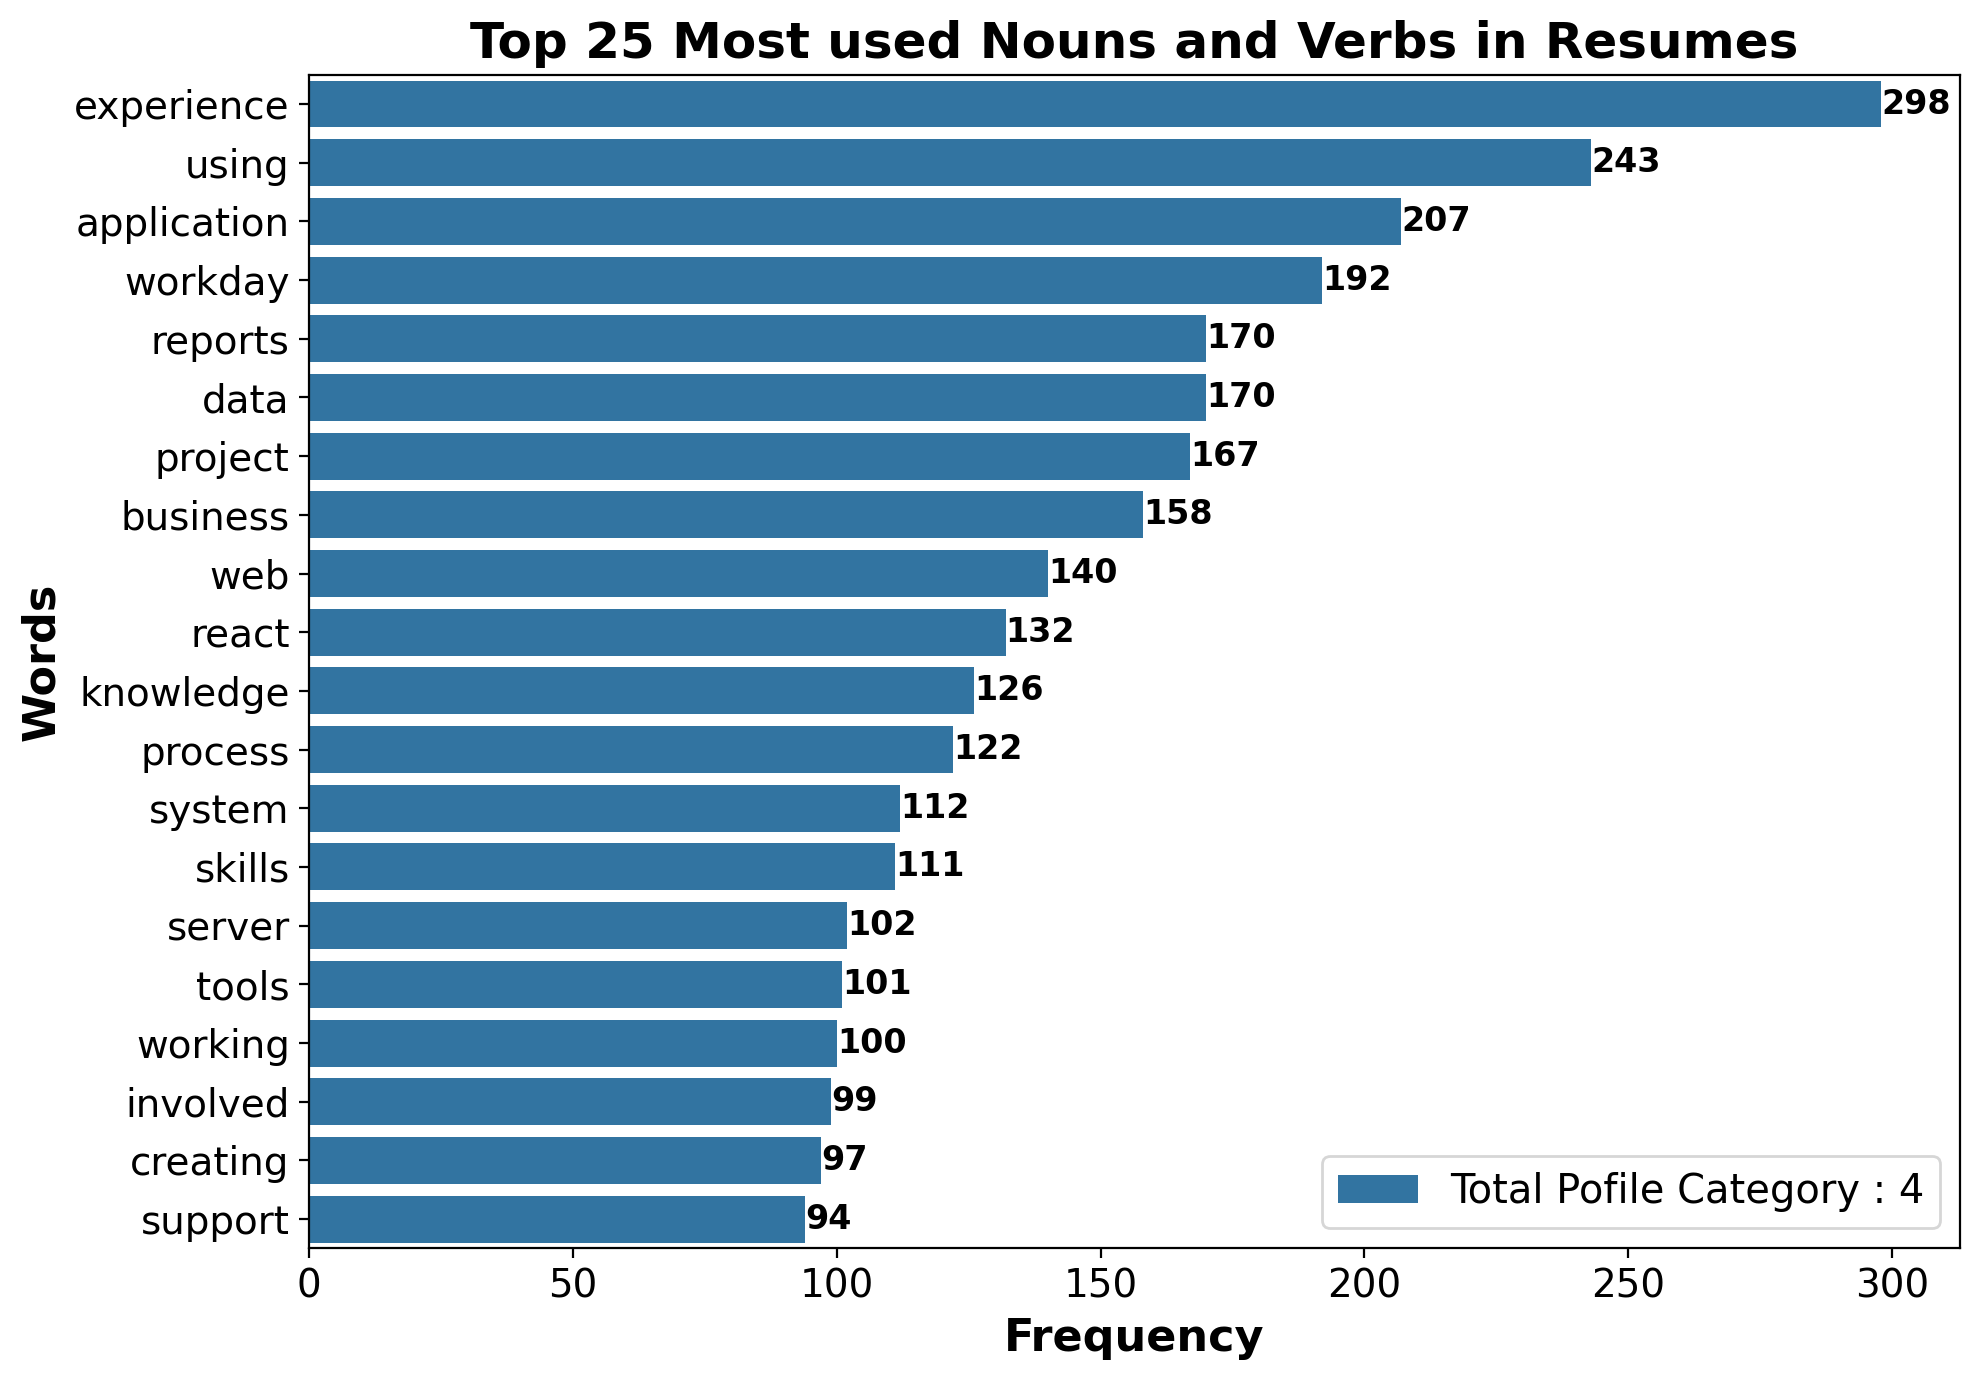

In [102]:
fig, axe = plt.subplots(1,1, figsize=(10,7), dpi=200)
ax = sns.barplot(x= wd_df['Count'].head(20), y= wd_df.Words.head(20), data= wd_df, ax = axe,
            label= 'Total Pofile Category : {}'.format(len(resume_data.Category.unique())))

axe.set_xlabel('Frequency', size=16,fontweight= 'bold')
axe.set_ylabel('Words', size=16, fontweight= 'bold')
plt.xticks(rotation = 0)
plt.legend(loc='best', fontsize= 'x-large')
plt.title('Top 25 Most used Nouns and Verbs in Resumes', fontsize= 18, fontweight= 'bold')
rcParams = {'xtick.labelsize':'14','ytick.labelsize':'14','axes.labelsize':'16'}

for i in ax.containers:
    ax.bar_label(i,color = 'black', fontweight = 'bold', fontsize= 12)

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()
import os

# ... (rest of your code) ...

# Create the directory if it doesn't exist
os.makedirs('IMG', exist_ok=True)

# Save the figure
fig.savefig('IMG/Top_Nouns_Verbs_Bar', dpi=500)

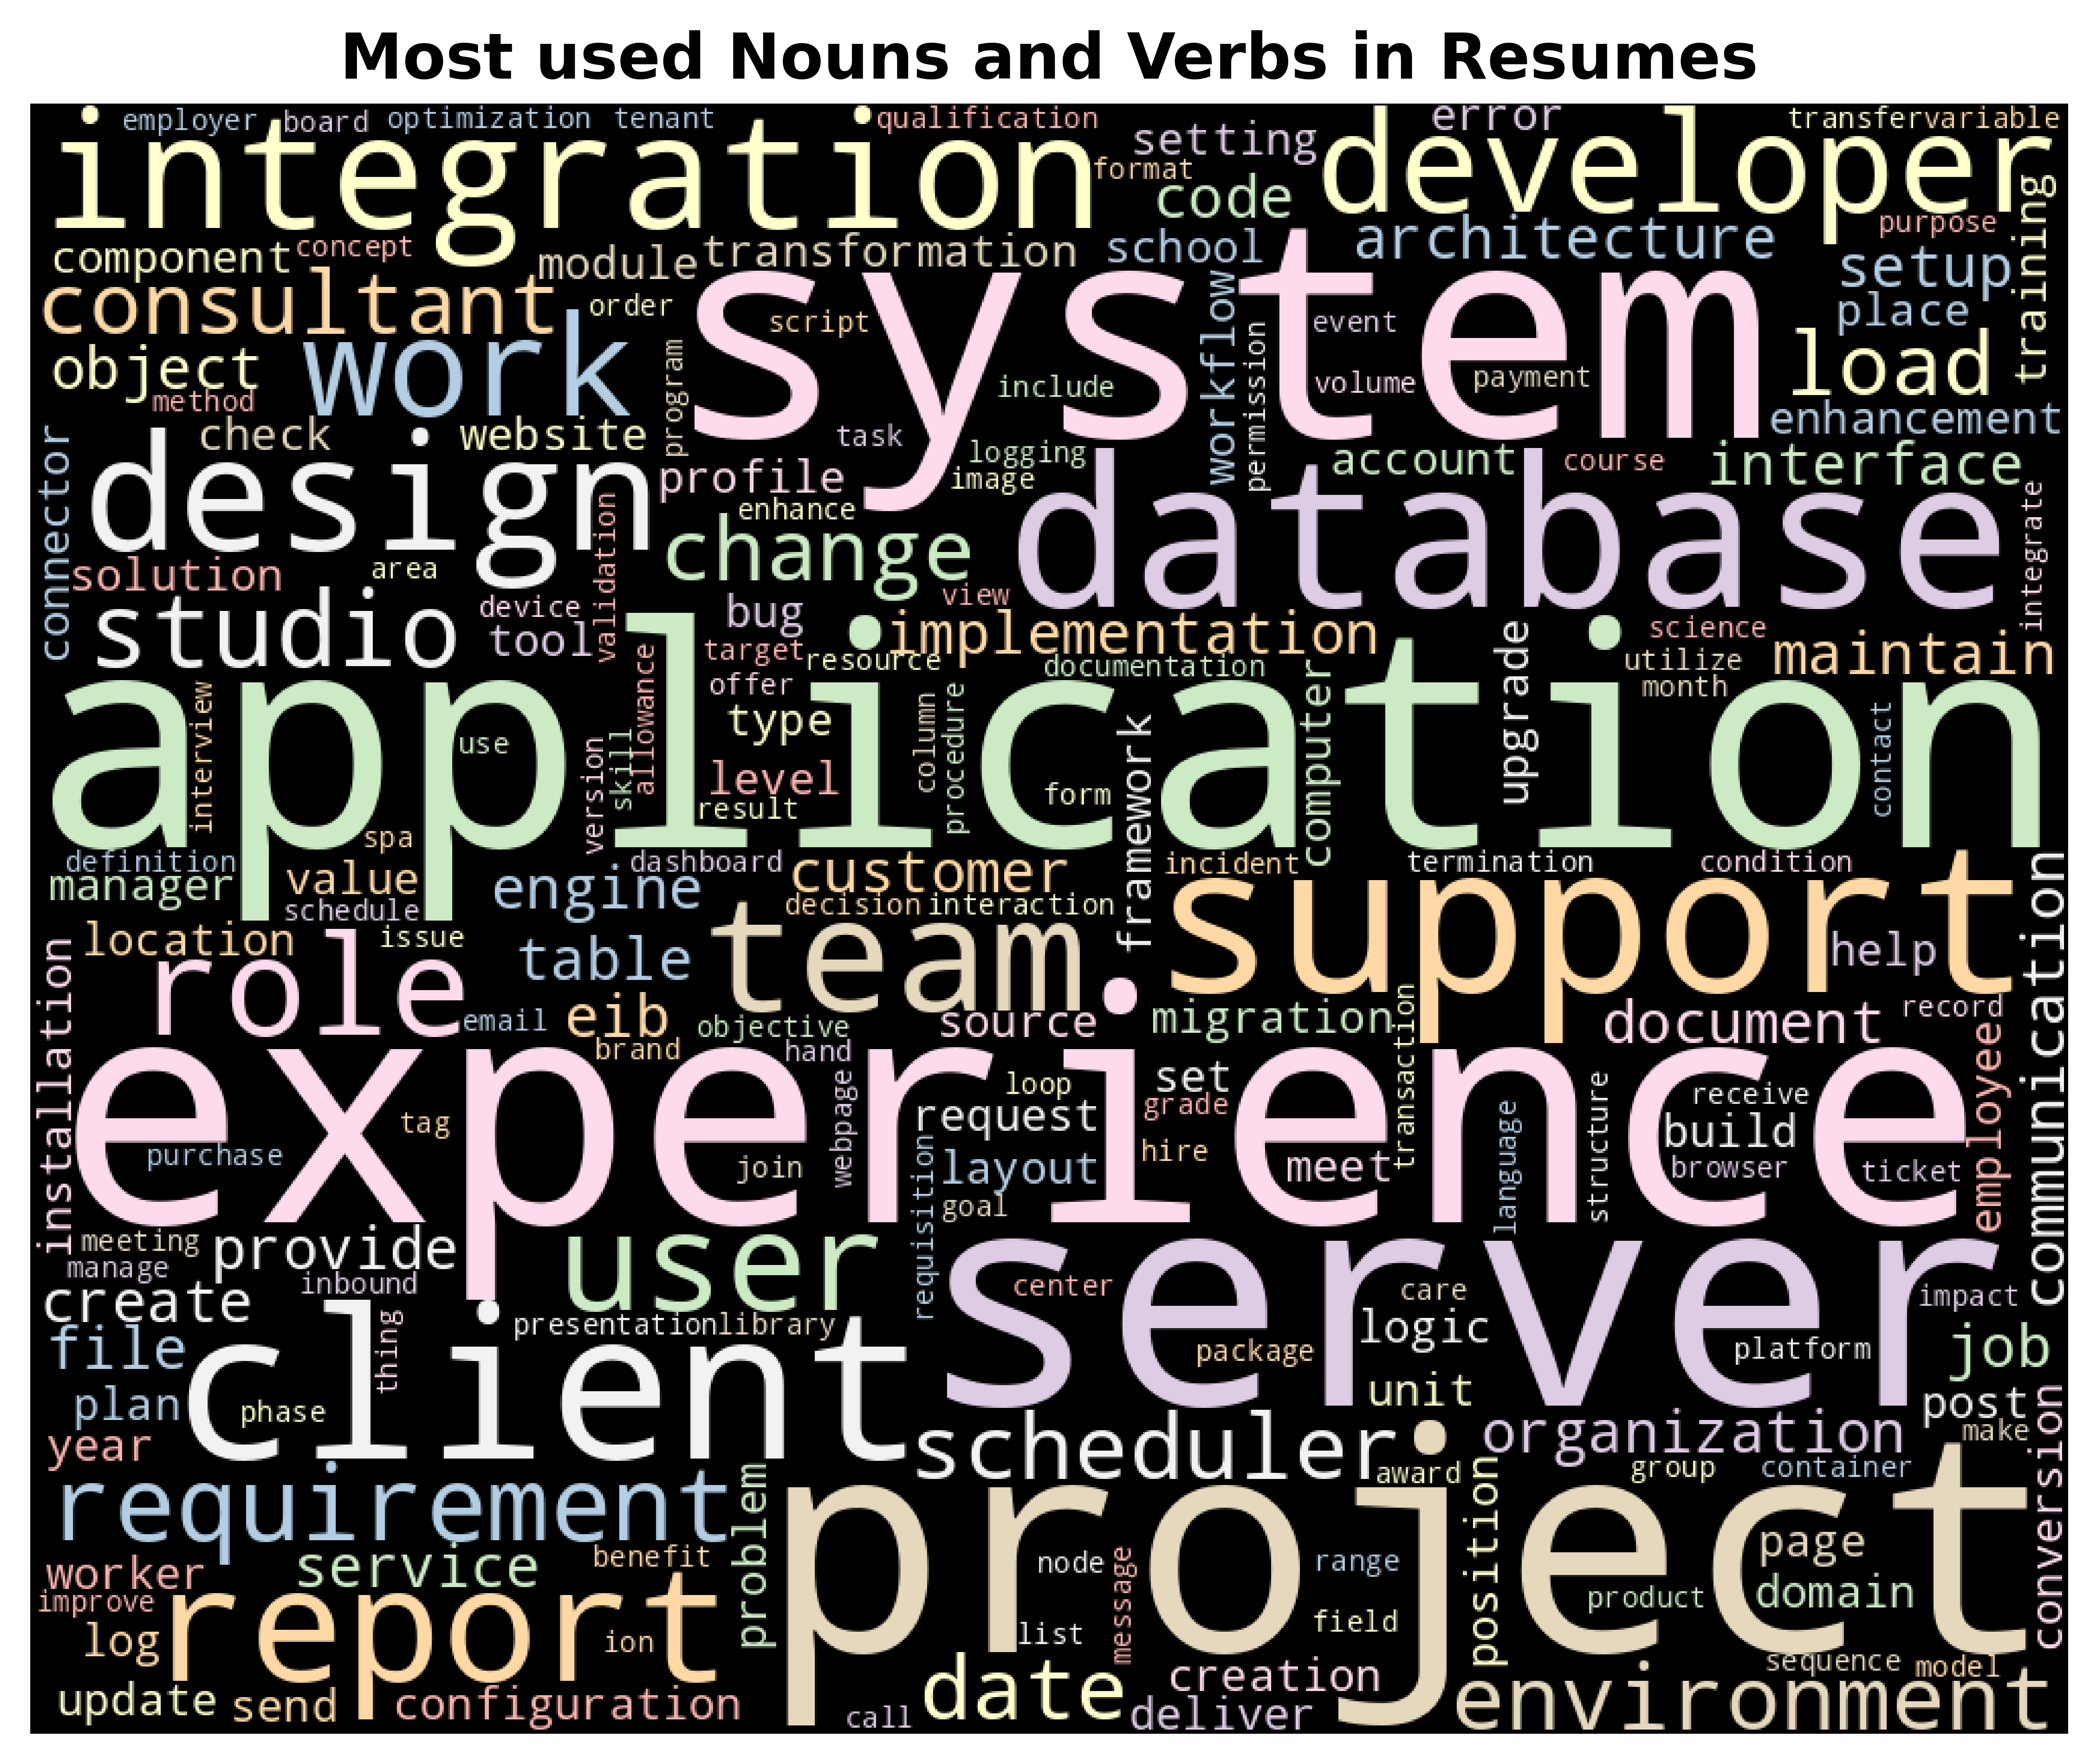

In [103]:
text = " ".join(cat for cat in wd_df.Words) # Creating the text variable

word_cloud = WordCloud(width=1000, height=800, random_state=10, background_color="black",
                       colormap="Pastel1", collocations=False, stopwords=STOPWORDS).generate(text)

plt.figure(figsize=(10,7), dpi=800) # Display the generated Word Cloud
plt.title('Most used Nouns and Verbs in Resumes', fontsize= 15, fontweight= 'bold')
plt.imshow(word_cloud)
plt.axis("off")

word_cloud.to_file('IMG/Word_Clowds_Noun_Verb.png')
plt.show()